
# Projet Maison 2

In [1]:
# python3 -m venv env_projet2
# .\env_projet2\Scripts\activate

In [2]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [3]:
DATA_DIR = 'data/'
data_path = f'{DATA_DIR}/correspondance-code-insee-code-postal.csv'

In [4]:
# chargement et traitement des données
GEO = pd.read_csv(data_path,
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
GEO

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape
Code INSEE,,,,,,,,,,
31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852..."
11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996..."
43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674..."
78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610..."
84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176..."
80462,80150,LAMOTTE-BULEUX,SOMME,PICARDIE,Commune simple,59.0,613.0,0.4,"50.1865666179, 1.83564836965","{""type"": ""Polygon"", ""coordinates"": [[[1.849459..."
40200,40410,MOUSTEY,LANDES,AQUITAINE,Commune simple,49.0,6736.0,0.7,"44.3882918763, -0.750880080586","{""type"": ""Polygon"", ""coordinates"": [[[-0.71016..."
17394,17700,SAINT-SATURNIN-DU-BOIS,CHARENTE-MARITIME,POITOU-CHARENTES,Commune simple,45.0,2528.0,0.9,"46.1401428747, -0.665133364912","{""type"": ""Polygon"", ""coordinates"": [[[-0.66124..."
...,...,...,...,...,...,...,...,...,...,...


In [5]:
GEO.dtypes

Code Postal          object
Commune              object
Département          object
Région               object
Statut               object
Altitude Moyenne    float64
Superficie          float64
Population          float64
geo_point_2d         object
geo_shape            object
dtype: object

In [6]:
def get_cp_ville(cp, commune):
    """ Get 'cp ville' from 'cp' and 'ville' """
    return f"{cp} {commune}"

In [7]:
# A COMPLETER avec les colonnes
# - lat, lon : latitude et longitude des communes
GEO["lat"] = GEO["geo_point_2d"].apply(lambda x: float(x.split(', ')[0]))
GEO["lon"] = GEO["geo_point_2d"].apply(lambda x: float(x.split(', ')[1]))

# - cp_ville : Code Postal + " " + "Commune"
GEO['cp_ville'] = GEO[['Code Postal', 'Commune']].apply(lambda x: get_cp_ville(*x), axis=1)

GEO.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,lat,lon,cp_ville
Code INSEE,,,,,,,,,,,,,
31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852...",43.290440,0.650641,31350 BOULOGNE-SUR-GESSE
11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996...",42.929138,2.901389,11510 FEUILLA
43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674...",45.130645,4.079525,43200 BESSAMOREL
78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610...",48.526763,1.805140,78660 PRUNAY-EN-YVELINES
84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176...",43.933779,4.908759,84310 MORIERES-LES-AVIGNON


**Partie A**

- Compléter le chargement des données en ajoutant au dataframe `GEO`
    - les colonnes "lat" et "lon" avec la latitude et la longitude des communes
    - une colonne "cp_ville" avec le Code Postal + un espace + et le nom de la Commune
- Ecrire une fonction `search_city(lat, lon)` qui retourne le "cp_ville" de la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ecrire une fonction `dms2dec(deg, min, sec)` qui convertit les degrés, minutes, secondes en valeur numérique pour pouvoir utiliser la fonction précédente avec un GPS.

In [8]:
from scipy.spatial import distance

def search_city(lat, long, verbose=False):
    """ Search nearest city in GEO dataframe from latitude and longitude """
    # Initialization
    coords = np.array(list(zip(GEO.lat, GEO.lon)))
    new_coord = np.array([(lat, long)])

    # Compute minimal distance and retrieve nearest city's coordinates
    dist = distance.cdist(coords, new_coord).min(axis=1)
    min_dist_value = min(dist)
    min_dist_pos = np.argmin(dist)
    if verbose:
        print(f"min_dist_value: {min_dist_value}\nmin_dist_pos: {min_dist_pos}")
    
    # Get cp_ville from the nearest city
    if verbose:
        print(f"Nearest coordinates for {tuple(new_coord[0])} is {tuple(coords[min_dist_pos])}")
    near_lat = coords[min_dist_pos][0]
    near_lon = coords[min_dist_pos][1]
    city = GEO[(GEO['lat']==near_lat) & (GEO['lon']==near_lon)]['cp_ville'].values[0]
    return city

In [9]:
search_city(42, 0.5)

'65510 LOUDENVIELLE'

In [10]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    """ Convert degree, minutes and secondes into decimal number """
    dec = deg + mn/60 + sec/3600
    return dec

In [11]:
# on applique la fonction à une coordonnée tirée au hasard
np.random.seed(0)
a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = np.random.uniform(a, b)
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
lon = np.random.uniform(a, b)

search_city(lat, lon)

'71330 BOSJEAN'

In [12]:
# à partir de coordonnées GPS précises
search_city(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'91120 PALAISEAU'

**Partie B**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python **json** pour parser les valeurs de la colonne "geo_shape" et mettre le résultat (`Series`) dans la variable `GEO_SHAPE`.
- Ecrire une fonction `get_types()` qui retourne le décompte (`value_counts()`) des valeurs accédées avec la clé "type".
- Ecrire une fonction `get_coordinates_len()` qui retourne le décompte (`value_counts()`) des longueurs des listes accédées avec la clé "coordinates".
- Ecrire une fonction `get_most_complex_city()` qui retourne la commune est constituée du plus grand nombre de polygones ?
- Ecrire une fonction `get_nb_cities_2_polygons()` qui retourne  le nombre de villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- **Facultatif :**
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : on pourra installer la librairie **shapely**, utiliser la classe Polygon de **shapely.geometry**  et la méthode `contains()`. Sur Windows **shapely** peut nécessiter d'installer manuellement la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [13]:
import json

# La variable GEO_SHAPE doit contenir une Serie correspondant aux valeurs de la colonne "geo_shape" parsées avec la librairie json
GEO_SHAPE = pd.Series([json.loads(x) for x in GEO["geo_shape"]], index=GEO.index, dtype=object)
GEO_SHAPE

Code INSEE
31080    {'type': 'Polygon', 'coordinates': [[[0.671852...
11143    {'type': 'Polygon', 'coordinates': [[[2.906996...
43028    {'type': 'Polygon', 'coordinates': [[[4.091674...
78506    {'type': 'Polygon', 'coordinates': [[[1.829610...
84081    {'type': 'Polygon', 'coordinates': [[[4.927176...
80462    {'type': 'Polygon', 'coordinates': [[[1.849459...
40200    {'type': 'Polygon', 'coordinates': [[[-0.71016...
17394    {'type': 'Polygon', 'coordinates': [[[-0.66124...
                               ...                        
15024    {'type': 'Polygon', 'coordinates': [[[2.302124...
76008    {'type': 'Polygon', 'coordinates': [[[1.205457...
02137    {'type': 'Polygon', 'coordinates': [[[3.258096...
74066    {'type': 'Polygon', 'coordinates': [[[6.026228...
67315    {'type': 'Polygon', 'coordinates': [[[8.106826...
07122    {'type': 'Polygon', 'coordinates': [[[4.356584...
01026    {'type': 'Polygon', 'coordinates': [[[4.926593...
50224    {'type': 'Polygon', 'coordinates': [

In [14]:
# value_counts des valeurs "type"
def get_types():
    return GEO_SHAPE.map(lambda x: x["type"]).value_counts()

get_types()

Polygon         36670
MultiPolygon       72
dtype: int64

In [15]:
# value_counts des longueurs de "coordinates"
def get_coordinates_len():
     return GEO_SHAPE.map(lambda x: len(x['coordinates'])).value_counts()

get_coordinates_len()

1    36660
2       80
3        1
4        1
dtype: int64

In [16]:
def get_most_complex_city():
    """ Get the most complex city (which contains the more polygons)"""

    # Retrieve INSEE code of the most complex city
    idx = GEO_SHAPE.map(lambda x: len(x["coordinates"])).idxmax()

    # Retrieve cp_ville within GEO dataframe
    cp_city = GEO.loc[[idx]]['cp_ville'].values[0]
    return cp_city

get_most_complex_city()

'83400 HYERES'

In [17]:
def get_nb_cities_2_polygons():
    """ Get the number of cities that are of type 'Polygon' and have a coordinates length of 2 """
    
    # Filter cities that satisfy the conditions
    s_coord = GEO_SHAPE[GEO_SHAPE.map(lambda x: len(x['coordinates'])==2)]
    s_coord_type = s_coord[s_coord.map(lambda x: x['type']=='Polygon')]
    
    # Compute the numberof cities
    nb_cities_2_polygons = s_coord_type.shape[0]
    return nb_cities_2_polygons

get_nb_cities_2_polygons()

10

In [18]:
# tests
import unittest

class Session2Test(unittest.TestCase):
    
    def test_partie_A1(self):
        # on applique la fonction cherche_ville() à une coordonnée tirée au hasard
        np.random.seed(0)
        a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
        lat = np.random.uniform(a, b)
        a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
        lon = np.random.uniform(a, b)

        cp_ville = search_city(lat, lon)
        self.assertEqual(cp_ville, "71330 BOSJEAN")
        
    def test_partie_A2(self):
        # à partir de coordonnées GPS précises
        cp_ville = search_city(dms2dec(48, 42, 52), dms2dec(2, 14, 45))
        self.assertEqual(cp_ville, "91120 PALAISEAU")
        
    def test_partie_B1(self):
        # check types
        dico = get_types()
        self.assertEqual(dico["Polygon"], 36670)
        self.assertEqual(dico["MultiPolygon"], 72)
        
    def test_partie_B2(self):
        # check coordinates len
        dico = get_coordinates_len()
        self.assertEqual(dico[1], 36660)
        self.assertEqual(dico[2], 80)
       
    def test_partie_B3(self):
        # check most complex city
        cp_ville = get_most_complex_city()
        self.assertEqual(cp_ville, "83400 HYERES")
        
    def test_partie_B4(self):
        # check nb cities 2 polygons
        nb = get_nb_cities_2_polygons()
        self.assertEqual(nb, 10)

In [19]:
# run tests
def run_tests():
    test_suite = unittest.makeSuite(Session2Test)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(test_suite)
    
run_tests()

test_partie_A1 (__main__.Session2Test) ... ok
test_partie_A2 (__main__.Session2Test) ... ok
test_partie_B1 (__main__.Session2Test) ... ok
test_partie_B2 (__main__.Session2Test) ... ok
test_partie_B3 (__main__.Session2Test) ... ok
test_partie_B4 (__main__.Session2Test) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.189s

OK


# Bonus
Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : on pourra installer la librairie **shapely**, utiliser la classe Polygon de **shapely.geometry**  et la méthode `contains()`. Sur Windows **shapely** peut nécessiter d'installer manuellement la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [20]:
def get_cities_2_polygons():
    """ Get the number of cities that satisfy 'Polygon' type and 2-length coordinates """
    
    # Filter cities that satisfy the conditions
    s_coord = GEO_SHAPE[GEO_SHAPE.map(lambda x: len(x['coordinates'])==2)]
    cities_2_polygons = s_coord[s_coord.map(lambda x: x['type']=='Polygon')]
    return cities_2_polygons

cities_2_polygons = get_cities_2_polygons()
cities_2_polygons

Code INSEE
2A272    {'type': 'Polygon', 'coordinates': [[[8.940487...
48080    {'type': 'Polygon', 'coordinates': [[[3.850531...
09042    {'type': 'Polygon', 'coordinates': [[[1.423960...
71028    {'type': 'Polygon', 'coordinates': [[[5.416652...
22209    {'type': 'Polygon', 'coordinates': [[[-2.11237...
02232    {'type': 'Polygon', 'coordinates': [[[3.037897...
2B049    {'type': 'Polygon', 'coordinates': [[[8.911220...
05052    {'type': 'Polygon', 'coordinates': [[[6.719912...
67486    {'type': 'Polygon', 'coordinates': [[[7.594939...
68078    {'type': 'Polygon', 'coordinates': [[[7.281156...
dtype: object

In [21]:
from shapely.geometry.polygon import Polygon

polygons_insee_code = list(cities_2_polygons.index.values)
print(f"polygons_insee_code: {polygons_insee_code}")

polygons = [(insee_code, [Polygon(coord) for coord in cities_2_polygons[insee_code]['coordinates']]) for insee_code in polygons_insee_code]
flag_enclaves_in_cities = np.all([polygon_tup[1][0].contains(polygon_tup[1][1]) for polygon_tup in polygons])
print(f"All cities have 1 enclave: {flag_enclaves_in_cities}")

polygons_insee_code: ['2A272', '48080', '09042', '71028', '22209', '02232', '2B049', '05052', '67486', '68078']
All cities have 1 enclave: True


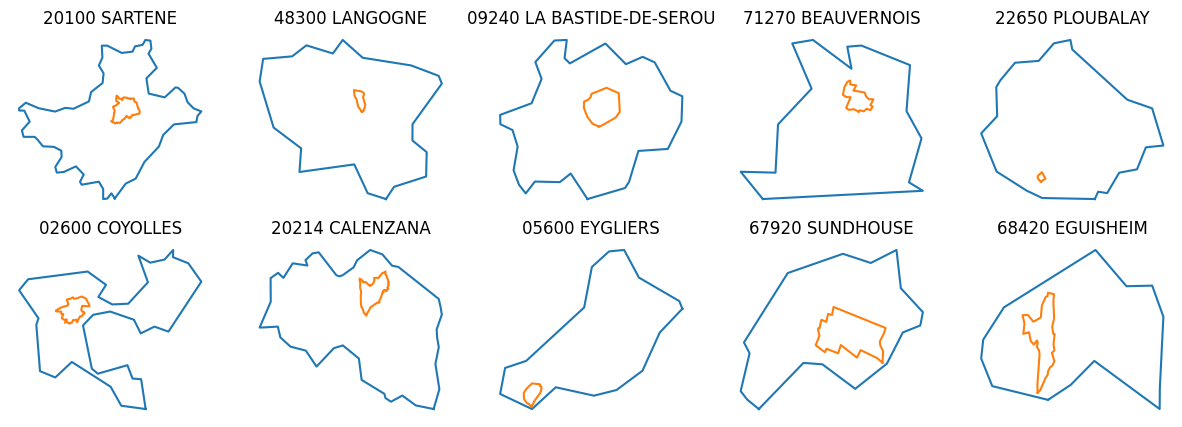

In [22]:
import matplotlib.pyplot as plt

N_rows, N_cols = 2, 5
fig, axs = plt.subplots(nrows=N_rows, ncols=N_cols, figsize=[15,5])
row, col = 0, 0

for num_polygon, polygon_tup in enumerate(polygons):
    col = num_polygon%N_cols
    row = num_polygon//N_cols
        
    # Retrieve cp city
    insee_code = polygon_tup[0]
    cp_city = GEO.loc[insee_code]['cp_ville']
    
    # Retrieve polygon object (city + enclave)
    poly_city = polygon_tup[1][0]
    poly_enclave = polygon_tup[1][1]
    
    # Plot city with enclave
    axs[row, col].plot(*poly_city.exterior.xy)
    axs[row, col].plot(*poly_enclave.exterior.xy)
    axs[row, col].set_title(cp_city)
    axs[row, col].axis('off')